<a href="https://colab.research.google.com/github/cierrakoen/class_4850-MachineLearning-Assignment2/blob/main/Copy_of_Assignment2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: Cierra Koen**

Undergraduate**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [ ]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Wine dataset from sklearn:

In [ ]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()


# Question 1 (10 points)

What can you say about the dataset (use code to descirbe it)? any particular things of interest? Find at least two things that you find interesting.

In [ ]:
##### Code block for Question 1
#properties
print(f"The different properties analyized within the wines is: {wine.feature_names}\n")

#classes
classSet = set(wine.target)
classString = str(classSet)
print(f"There are {classString} different class outputs given by the dataset given by {wine.target_names} \n")

#numOfParameters
inst = 178
attri = 13
parameters = lambda x,y : x*y
res = parameters(inst,attri)
print(f"There are {res} different parameters used")

The different properties analyized within the wines is: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

There are {0, 1, 2} different class outputs given by the dataset given by ['class_0' 'class_1' 'class_2'] 

There are 2314 different parameters used


Textual answer to question 1 goes here.

# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [ ]:
from sklearn.model_selection import train_test_split
##### Code block for Question 2
x = wine.data
y = wine.target

#removing 2 from each instance
X = x[y != 2] #130 
Y = y[y != 2] #0 & 1's

#creating training and test data split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=1234)


# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [ ]:
##### Code block for Question 3
from sklearn.linear_model import Perceptron

new_model = Perceptron(random_state = 1234)

new_model.fit(X_train, y_train)

model_accuracy = new_model.score(X_test, y_test)

print(model_accuracy)

0.6739130434782609


# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [ ]:
##### Code block for Question 4
from sklearn.metrics import classification_report

prediction = new_model.predict(X_test)

class_report1 = classification_report(y_test, prediction,output_dict=True)

print(class_report1)


{'0': {'precision': 1.0, 'recall': 0.21052631578947367, 'f1-score': 0.34782608695652173, 'support': 19}, '1': {'precision': 0.6428571428571429, 'recall': 1.0, 'f1-score': 0.782608695652174, 'support': 27}, 'accuracy': 0.6739130434782609, 'macro avg': {'precision': 0.8214285714285714, 'recall': 0.6052631578947368, 'f1-score': 0.5652173913043479, 'support': 46}, 'weighted avg': {'precision': 0.7903726708074535, 'recall': 0.6739130434782609, 'f1-score': 0.6030245746691871, 'support': 46}}


Textual answer to question 4 goes here.



1.   Based on the precision score of class 0, the model is very accurate in predictiong positives rather than class 1 which is less likely and may predict more false positives.  
2.   The recall for class 0 is lower than class 1, meaning that class 0 can not identify positive cases more than class 1.
3. However, the thing is that since there is such a vast difference between precision and recall the f1-score between each classes shows that class 1 can find postive cases while trying to minimize false positives making class 1 more reliable. 



# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

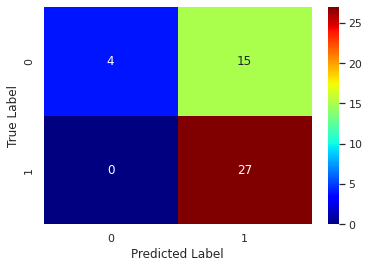

In [ ]:
##### Code block for Question 5 - part 1
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


cm = confusion_matrix(y_test, prediction,labels= new_model.classes_)

sns.heatmap(cm, annot=True, fmt='d', cmap='jet')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

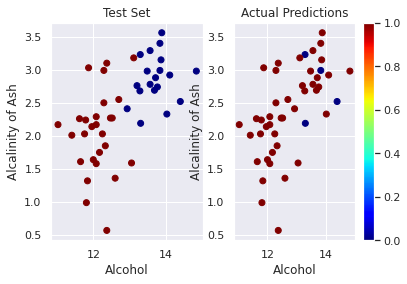

In [ ]:
##### Code block for Question 5 - part 2

# indexes alchol and alcalinity_of_ash
features = X_test[:, [0, 6]]  

#labels of test and prediciton
test_label = y_test
pred_label = prediction

# left side
plt.subplot(121)
plt.scatter(features[:, 0], features[:, 1], c=test_label,cmap='jet')
plt.xlabel('Alcohol')
plt.ylabel('Alcalinity of Ash')
plt.title('Test Set')

# right side
plt.subplot(122)
plt.scatter(features[:, 0], features[:, 1], c=pred_label, cmap='jet')
plt.xlabel('Alcohol')
plt.ylabel('Alcalinity of Ash')
plt.title('Actual Predictions')


plt.colorbar(cmap='jet')
plt.show()




# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Textual answer to question 6 a goes here.

No because there are 27 true dots and 4 flase trues of predicted values but does not show any false positives.

Textual answer to question 6 b goes here.

1. Based on the models performance the model predicts more positive perdictions than the test set.
2. This also means more negative results are seen as true

# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [ ]:
##### Code block for Question 7

#data and target arrays
X2 = wine.data
Y2 = wine.target

#finding test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.35, random_state=1234)

# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [ ]:
##### Code block for Question 8
from sklearn import tree
from sklearn import metrics

# using Decision tree
d_model = tree.DecisionTreeClassifier()
# training model
d_model.fit(X2_train,y2_train)
#y hat prediction
prediction2 = d_model.predict(X2_test)
#accuracy
print("Accuracy: ",metrics.accuracy_score(y2_test, prediction2))

Accuracy:  0.8571428571428571


# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [ ]:
##### Code block for Question 9
class_report2 = classification_report(y2_test, prediction2,output_dict=True)

print(class_report2)

{'0': {'precision': 0.9375, 'recall': 0.7894736842105263, 'f1-score': 0.8571428571428572, 'support': 19}, '1': {'precision': 0.8148148148148148, 'recall': 0.8461538461538461, 'f1-score': 0.830188679245283, 'support': 26}, '2': {'precision': 0.85, 'recall': 0.9444444444444444, 'f1-score': 0.8947368421052632, 'support': 18}, 'accuracy': 0.8571428571428571, 'macro avg': {'precision': 0.8674382716049384, 'recall': 0.860023991602939, 'f1-score': 0.8606894594978011, 'support': 63}, 'weighted avg': {'precision': 0.8618680188124632, 'recall': 0.8571428571428571, 'f1-score': 0.856760049269625, 'support': 63}}


Textual answer to question 9 goes here.

1. One thing I have noticed is that the f1 score has increased for all categories most likely because we are now categorizing every class. 
2. I also noticed that that the recall for class 2 is now 1 when before class one had a recall of 1 because we added the last class
3. I also noticed that class 1 loses one data point.  

# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

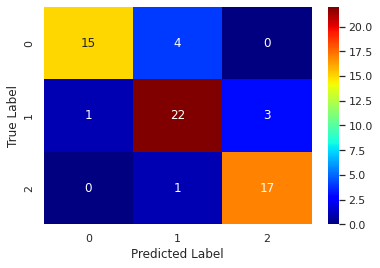

In [ ]:
##### Code block for Question 10 - part 1
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


cm = confusion_matrix(y2_test, prediction2,labels= d_model.classes_)

sns.heatmap(cm, annot=True, fmt='d', cmap='jet')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

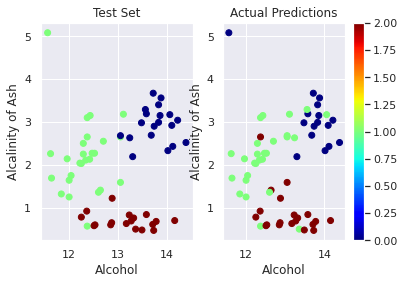

In [ ]:
##### Code block for Question 10 - part 2

# indexes alchol and alcalinity_of_ash
features = X2_test[:, [0, 6]]  

#labels of test and prediciton
test_label = y2_test
pred_label = prediction2

# left side
plt.subplot(121)
plt.scatter(features[:, 0], features[:, 1], c=test_label,cmap='jet')
plt.xlabel('Alcohol')
plt.ylabel('Alcalinity of Ash')
plt.title('Test Set')

# right side
plt.subplot(122)
plt.scatter(features[:, 0], features[:, 1], c=pred_label, cmap='jet')
plt.xlabel('Alcohol')
plt.ylabel('Alcalinity of Ash')
plt.title('Actual Predictions')


plt.colorbar(cmap='jet')
plt.show()

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

Textual answer to question 11 a goes here.

Yes because the new plots on the graph change the few points that are predicted on the confusuion matrix. 



Textual answer to question 11 b goes here.

1. The most interesting observation is that the prediction is very close to the test data showing that our model is predicting more accuratly. 
2. The two model plots almost look excatly the same with all 3 class representations.

<ipython-input-216-7c9a0f512a6e>:35: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


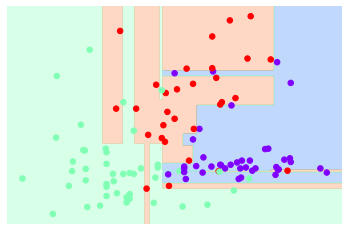

In [216]:
##### Code block for Question 11 - part c
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier
X2_2 = wine.data[:, :2]
Y2_2 = wine.target


X2_2train, X2_2test, y2_2train, y2_2test = train_test_split(X2_2, Y2_2, test_size=0.35, random_state=1234)

tree1 = DecisionTreeClassifier().fit(X2_2train,y2_2train)


def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(tree1, X2_2train, y2_2train)


# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [ ]:
##### Code block for Question 12

#data and target arrays
X3 = wine.data
Y3= wine.target

#finding test data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.35, random_state=1234)


# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [ ]:
##### Code block for Question 13
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1234, multi_class="ovr", solver="liblinear")

lr.fit(X3_train, y3_train)

prediction3 = lr.predict(X3_test)

#accuracy
print("Accuracy: ",metrics.accuracy_score(y3_test, prediction3))

Accuracy:  0.9523809523809523


# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [ ]:
##### Code block for Question 14
class_report3 = classification_report(y3_test, prediction3,output_dict=True)

print(class_report3)

{'0': {'precision': 1.0, 'recall': 0.9473684210526315, 'f1-score': 0.972972972972973, 'support': 19}, '1': {'precision': 0.96, 'recall': 0.9230769230769231, 'f1-score': 0.9411764705882353, 'support': 26}, '2': {'precision': 0.9, 'recall': 1.0, 'f1-score': 0.9473684210526316, 'support': 18}, 'accuracy': 0.9523809523809523, 'macro avg': {'precision': 0.9533333333333333, 'recall': 0.9568151147098516, 'f1-score': 0.9538392882046134, 'support': 63}, 'weighted avg': {'precision': 0.9549206349206348, 'recall': 0.9523809523809523, 'f1-score': 0.9525350206464757, 'support': 63}}


Textual answer to question 14 goes here.

1. I noticed that this is the highest f1-score between the other methods showing that this method is more successful in comming up with correct positive assumptions. 
2. Another thing is that the precision for class 0 has gone up by a few thousands rather to now equal 1. 
3.Precision  also becomes better for class 2 by .1 but does not affect the f1 score.

# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

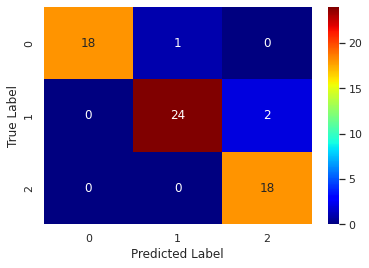

In [ ]:
##### Code block for Question 15 - part 1
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


cm = confusion_matrix(y3_test, prediction3,labels= lr.classes_)

sns.heatmap(cm, annot=True, fmt='d', cmap='jet')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

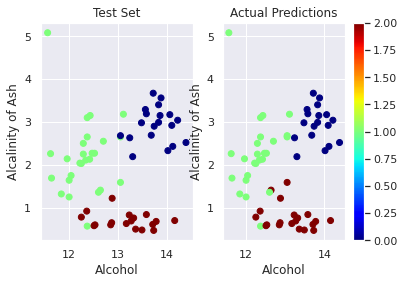

In [ ]:
##### Code block for Question 15 - part 2
# indexes alchol and alcalinity_of_ash
features = X3_test[:, [0, 6]]  

#labels of test and prediciton
test_label = y3_test
pred_label = prediction3

# left side
plt.subplot(121)
plt.scatter(features[:, 0], features[:, 1], c=test_label,cmap='jet')
plt.xlabel('Alcohol')
plt.ylabel('Alcalinity of Ash')
plt.title('Test Set')

# right side
plt.subplot(122)
plt.scatter(features[:, 0], features[:, 1], c=pred_label, cmap='jet')
plt.xlabel('Alcohol')
plt.ylabel('Alcalinity of Ash')
plt.title('Actual Predictions')


plt.colorbar(cmap='jet')
plt.show()

# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Textual answer to question 16 a goes here.

Yes because there are only three different changes that happen to the actual predicitons which is reflectd within the matrix.


Textual answer to question 16 b goes here.

1. I notice that the model is even more correct in terms of prediction.
2. It seems that there is better clustering in terms of each class which will make it easier to have seperators around our data. 

# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [ ]:
##### Code block for Question 17

# importing the module
import pandas as pd
  
# creating a DataFrame
dict = {'Preceptron' : class_report1,
        'Decision Tree' : class_report2,
        'LinearRegression' : class_report3}
        
df = pd.DataFrame(dict)
  
# displaying the DataFrame
df.style

,Preceptron,Decision Tree,LinearRegression
0,"{'precision': 1.0, 'recall': 0.21052631578947367, 'f1-score': 0.34782608695652173, 'support': 19}","{'precision': 0.9375, 'recall': 0.7894736842105263, 'f1-score': 0.8571428571428572, 'support': 19}","{'precision': 1.0, 'recall': 0.9473684210526315, 'f1-score': 0.972972972972973, 'support': 19}"
1,"{'precision': 0.6428571428571429, 'recall': 1.0, 'f1-score': 0.782608695652174, 'support': 27}","{'precision': 0.8148148148148148, 'recall': 0.8461538461538461, 'f1-score': 0.830188679245283, 'support': 26}","{'precision': 0.96, 'recall': 0.9230769230769231, 'f1-score': 0.9411764705882353, 'support': 26}"
accuracy,0.673913,0.857143,0.952381
macro avg,"{'precision': 0.8214285714285714, 'recall': 0.6052631578947368, 'f1-score': 0.5652173913043479, 'support': 46}","{'precision': 0.8674382716049384, 'recall': 0.860023991602939, 'f1-score': 0.8606894594978011, 'support': 63}","{'precision': 0.9533333333333333, 'recall': 0.9568151147098516, 'f1-score': 0.9538392882046134, 'support': 63}"
weighted avg,"{'precision': 0.7903726708074535, 'recall': 0.6739130434782609, 'f1-score': 0.6030245746691871, 'support': 46}","{'precision': 0.8618680188124632, 'recall': 0.8571428571428571, 'f1-score': 0.856760049269625, 'support': 63}","{'precision': 0.9549206349206348, 'recall': 0.9523809523809523, 'f1-score': 0.9525350206464757, 'support': 63}"
2,nan,"{'precision': 0.85, 'recall': 0.9444444444444444, 'f1-score': 0.8947368421052632, 'support': 18}","{'precision': 0.9, 'recall': 1.0, 'f1-score': 0.9473684210526316, 'support': 18}"


Textual answer to question 17 goes here.

Linear Regression is the best model because it is more efficent in finding linear classifications because the regression model assumses the correct values based on the relationship between variables and predictions.

# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


In [ ]:
##### Code block for Graduate Student Question